In [1]:
import edr3funcs

Replace `BW Cir` below with your source of choice and tweak `search_radius` to your preference (in arcsec).

In [2]:
source_name = 'BW Cir'
search_radius = 0.8     # arcsec
gaia_tab_dr2, gaia_tab_dr3 = edr3funcs.gaia_search(edr3funcs.target_resolver(source_name), 0.8)
edr3funcs.gaia_zpcorr(gaia_tab_dr2,'dr2');
edr3funcs.gaia_zpcorr(gaia_tab_dr3,'dr3');

 MAIN_ID       RA          DEC      ... COO_WAVELENGTH     COO_BIBCODE    
            "h:m:s"      "d:m:s"    ...                                   
--------- ------------ ------------ ... -------------- -------------------
V* BW Cir 13 58 09.700 -64 44 05.80 ...              R 2016A&A...587A..61C
Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
DR2: Found 1 sources
DR3: Found 1 sources


If the cell above runs without any issue and the source is correctly resolved and you see only 1 source found in DR2 and DR3, you can proceed. If the number of sources found is not 1, tweak the search radius so that it becomes 1 for both.

-------

In the cell below, `tau_dr2` and `tau_dr3` are cutoff thresholds (in probability density) for determining the confidence interval on the distance PDF. You can tweak them to achieve the desired confidence interval (which you can check printed in the outputs).

`distance_plotting_range` is simply the range of distances to plot for the PDF in kpc.

Gaia dr2
Most likely distance (kpc): 6.65
PDF mode: 0.0855
Limits on distance (kpc): 2.02--11.6
Confidence interval(%): 68.8
Dinstance: 6.65(-4.62/+4.92) kpc
--------------------
Gaia dr3
Most likely distance (kpc): 7.08
PDF mode: 0.0922
Limits on distance (kpc): 3.17--11.8
Confidence interval(%): 67.7
Dinstance: 7.08(-3.92/+4.75) kpc
--------------------


/home/arash/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


designation,parallax,parallax_error,parallax_over_error,zpcorr_val,parallax_zpcorr,pmra,pmra_error,pmdec,pmdec_error
,mas,mas,,,,mas / yr,mas / yr,mas / yr,mas / yr
object,float64,float64,float32,float64,float64,float64,float64,float64,float64
Gaia DR2 5852296053620905472,1.8299442196681828,0.5809912173734313,3.1496935,-0.048,1.8779442196681828,-9.378606679658716,2.2166659097721877,-5.695804319925711,2.2555568586236228
Gaia EDR3 5852296053620905472,1.2744322218246655,0.5343025922775269,2.3852255,-0.0017460000235587358,1.2761782218482243,-5.07214304739342,0.6306256651878357,-2.105055654877221,0.5823823809623718


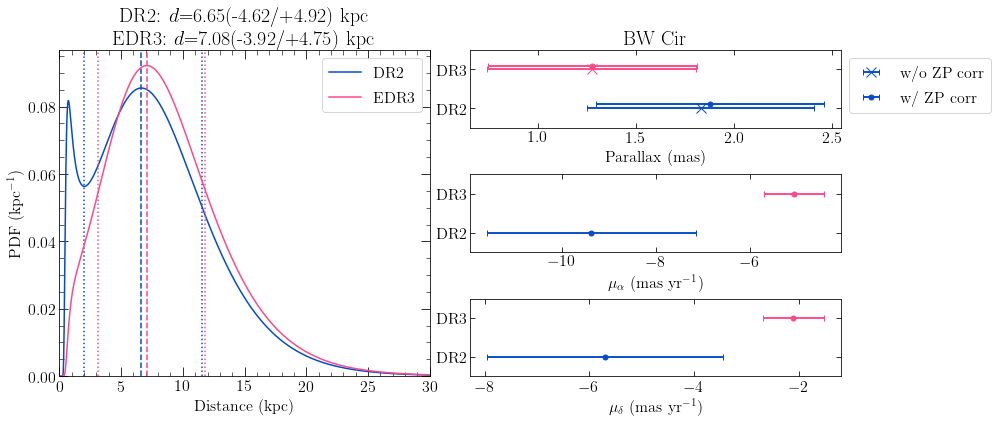

In [3]:
tau_dr2 = 0.05
tau_dr3 = 0.055
distance_plotting_range = [0,30]

###
atri_MAP_dr2, atri_pdf_dr2, distrange_dr2 = edr3funcs.atri_dist(gaia_tab_dr2['parallax_zpcorr'][0],
                                                                gaia_tab_dr2['parallax_error'][0],
                                                                gaia_tab_dr2['ra'][0],gaia_tab_dr2['dec'][0])

atri_MAP_dr3, atri_pdf_dr3, distrange_dr3 = edr3funcs.atri_dist(gaia_tab_dr3['parallax_zpcorr'][0],
                                                                gaia_tab_dr3['parallax_error'][0],
                                                                gaia_tab_dr3['ra'][0],gaia_tab_dr3['dec'][0])


lolim_dr2, uplim_dr2, ci_dr2 = edr3funcs.atri_CIcalc(tau_dr2,atri_MAP_dr2, atri_pdf_dr2,'dr2')
lolim_dr3, uplim_dr3, ci_dr3 = edr3funcs.atri_CIcalc(tau_dr3,atri_MAP_dr3, atri_pdf_dr3,'dr3')

tab, fig = edr3funcs.comparison(source_name,gaia_tab_dr2,gaia_tab_dr3,
                                atri_MAP_dr2, atri_pdf_dr2, distrange_dr2,
                                atri_MAP_dr3, atri_pdf_dr3, distrange_dr3,
                                lolim_dr2, uplim_dr2, ci_dr2,
                                lolim_dr3, uplim_dr3, ci_dr3, distxrange=distance_plotting_range);

tab

Assumptions in these calculations and plots:
- Parallax ZP correction for DR2 is from [Chan & Bovy 2020](https://ui.adsabs.harvard.edu/abs/2020MNRAS.493.4367C/abstract).
- Parallax ZP correction for EDR3 is from [Lindegren et al. 2020](https://arxiv.org/abs/2012.01742).
- Distance is calculated using Galactic disk and bulge structure prior from [Atri et al. 2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.489.3116A/abstract).